In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

# importing data

In [2]:
data=pd.read_csv("dataset1/Train1.csv",header=None,names=["x1","x2","y"])
data.head()

,x1,x2,y
0,4.830686,3.050905,0.0
1,4.385330,4.491989,0.0
2,5.653520,4.852372,0.0
3,3.487049,5.517360,0.0
4,6.339344,5.173789,0.0


# splitting data into input and ouput data


In [3]:
inputs=[]
labels=data["y"]
for i in range(data.shape[0]):
    inputs.append([data["x1"][i],data["x2"][i]])


function for training and predicting the model.
no of weights is 3(no of features plus bias)


In [4]:
weights=np.random.randn(3)
error=0
iteration=0
loss=0
losses=[]
def predict(input):
        summation = np.dot(input,weights[1:]) + weights[0]
        if summation >= 0:
            activation = 1
        else:
            activation = 0            
        return activation
    
def train(inputs, labels):
    global iteration
    for _ in range(100):
        global loss
        loss=0
        for input, label in zip(inputs, labels):
            prediction = predict(input)
            weights[1:] += np.dot((int(label) - prediction) ,input)
            if(prediction != label):
                loss=loss+1
            
            weights[0] += (int(label) - prediction)
        losses.append(loss)
        iteration=iteration+1
        
train(inputs,labels)
print(weights)

[-16.86722397   0.3354653    1.10932381]


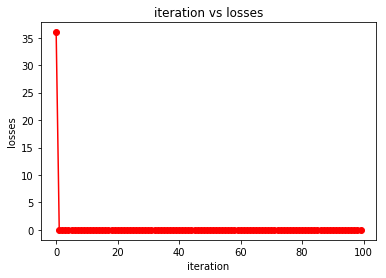

In [5]:
itr=[i for i in range(iteration)]
plt.plot(itr,losses,'-or')
plt.title('iteration vs losses')
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()


In [6]:
accuracy=[(data.shape[0]-losses[i])/data.shape[0] for i in range(iteration)]

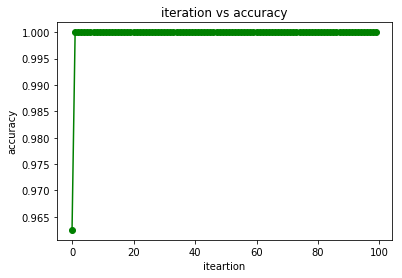

In [7]:

plt.plot(itr,accuracy,'-og')
plt.title('iteration vs accuracy')
plt.xlabel('iteartion')
plt.ylabel('accuracy')
plt.show()

confusion matrix

In [8]:
#print(confusion_matrix(test_lbl,predicted_lbl))

# working with test data

In [9]:
test_data=pd.read_csv("dataset1/Test1.csv",header=None,names=["x","y","l"])
testx_y=[]
for i in range(test_data.shape[0]):
    testx_y.append([test_data["x"][i],test_data["y"][i]])
test_lbl=test_data["l"]

prediction for test data

In [10]:
px=[]
py=[]
nx=[]
ny=[]
predicted_lbl=[]
def test(cord):
    for x_y in (cord):
        pred=predict(x_y)
        predicted_lbl.append(pred)
        if(pred==1):
            px.append(x_y[0])
            py.append(x_y[1])
            
        else:
            nx.append(x_y[0])
            ny.append(x_y[1])
            
        
            
test(testx_y)

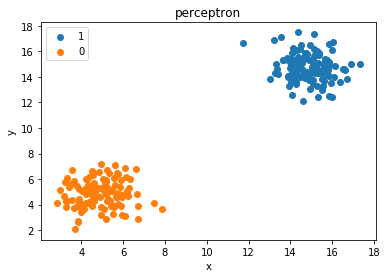

In [11]:
plt.scatter(px, py,label="1")
plt.scatter(nx, ny,label="0")
plt.title('perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.legend() 
plt.show()


ploting of two class 

confusion matrix 

In [12]:
print(confusion_matrix(test_lbl,predicted_lbl))

[[123   0]
 [  0 117]]


In [13]:
print('test_accuracy:',metrics.accuracy_score(test_lbl,predicted_lbl))

test_accuracy: 1.0


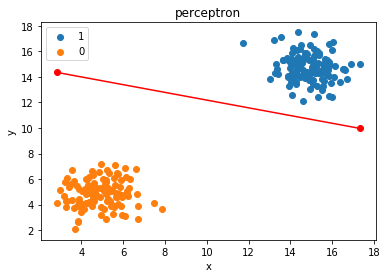

In [14]:
minx = min(min(px),min(nx))
maxx = max(max(px),max(nx))

miny = - (weights[0] + weights[1] * minx) / weights[2]
maxy = - (weights[0] + weights[1] * maxx) / weights[2]

plt.scatter(px, py,label="1")
plt.scatter(nx, ny,label="0")
plt.legend()
plt.title('perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([minx, maxx], [miny, maxy], 'or-')
plt.show()

# Observation
acccuracy increases with increase in iteration

loss and accuracy are inversely proportional


accuracy for the test1 data is 100%

weights=[-39.82966853   2.37663226   1.28996032]
